# Dfs1

A dfs1 file contains node-based line series data. Dfs1 files do not
contain enough metadata to determine their geographical position, but
have a relative distance from the origo.

In [1]:
import mikeio

ds = mikeio.read("../data/tide1.dfs1")
ds

<mikeio.Dataset>
dims: (time:97, x:10)
time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00 (97 records)
geometry: Grid1D (n=10, dx=0.06667)
items:
  0:  Level <Water Level> (meter)

## Grid 1D

The spatial information is available in the `geometry` attribute
(accessible from Dfs1, Dataset, and DataArray), which in the case of a
dfs1 file is a [`Grid1D`](../api/Grid1D.html#mikeio.Grid1D) geometry.

In [2]:
ds.geometry

<mikeio.Grid1D>
x: [0, 0.06667, ..., 0.6] (nx=10, dx=0.06667)

Grid1D’s primary properties and methods are:

-   `x`
-   `nx`
-   `dx`
-   `find_index()`
-   `isel()`

See [API specification](../api/Grid1D.html#mikeio.Grid1D) for details.

## Creating a dfs1 file

1.  Create a datetime index
2.  Create a data array with dimensions (time, x)

In this example the grid consist of two points (west and east), but the
same approach can be used for any number of points.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mikeio

t = pd.date_range("2021-01-01", periods=100, freq="15min")
t_rel = (t - t[0]).total_seconds().values

west = np.sin(t_rel / 3600)
east = 1.2*np.sin(t_rel / 3600 + 0.5)

data = np.column_stack((west, east))
data.shape

(100, 2)

1.  Create a `Grid1D` geometry with the number of points in the
    x-direction and the spacing.

In [4]:
geometry = mikeio.Grid1D(nx=2, dx=1)
geometry

<mikeio.Grid1D>
x: [0, 1] (nx=2, dx=1)

1.  Create a `DataArray` object with the data, time, geometry, and item
    information.

In [5]:
da = mikeio.DataArray(
    data,
    time=t,
    geometry=geometry,
    item=mikeio.ItemInfo("Water level", mikeio.EUMType.Water_Level),
)
da

<mikeio.DataArray>
name: Water level
dims: (time:100, x:2)
time: 2021-01-01 00:00:00 - 2021-01-02 00:45:00 (100 records)
geometry: Grid1D (n=2, dx=1)

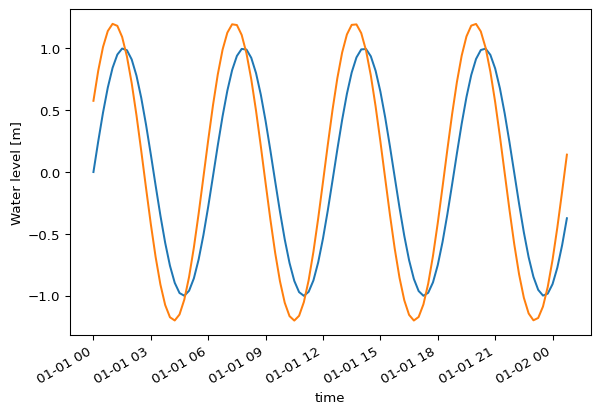

In [6]:
da.plot.timeseries()

Optional, repeat step 4 for additional items to create a Dataset.

1.  Write to a dfs1 file.

In [7]:
da.to_dfs("boundary.dfs1")